## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [51]:
import pandas as pd
#
var_list = ['pornlaw', 'sexeduc', 'degree', 'age', 'childs', 'spkhomo', 'cappun', 'conclerg', 'happy', 'year'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
data = pd.read_csv("selected_gss_data.csv")

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data)

                                                 pornlaw sexeduc  \
0                                                    NaN     NaN   
1                                                    NaN     NaN   
2                                                    NaN     NaN   
3                                                    NaN     NaN   
4                                                    NaN     NaN   
...                                                  ...     ...   
72385                                                NaN   favor   
72386                                                NaN   favor   
72387  there should be laws against the distribution ...   favor   
72388  there should be laws against the distribution ...     NaN   
72389  there should be laws against the distribution ...   favor   

                         degree   age  childs spkhomo  cappun   conclerg  \
0                    bachelor's  23.0     0.0     NaN     NaN        NaN   
1         less than high school

The variables that I chose for this assignment were age, year, number of children, degree type, happiness, preference for sexual education, confidence in the clergy, opinion on capital punishment, perference on laws regarding pornography. Some of these values are basic ones that should be included in most analyses of the dataset, such as age and year of the study. The goal for the rest of the variables was to analyze how personal attritubtes and morals effect social opinions. For example, it would be interesting to see how ones happiness might relate to their opinion on pornography. Many would consider pornography to be an ill on society and something that detracts from happiness, while some may feel the opposite. Another social value that will be interesting to look at is wheather or not a homosexual individual should be allowed to speak. This is another social value that many both agree and disagree with, but their might be correlation to other social values as well. There will also be merit in looking at data regarding if sexual education should be taught in schools or not and seeing if this value is related to any personal attributes.

In [62]:
#clean the pornlaw column by shortening cell values
print(data['pornlaw'].unique())
data["pornlaw_clean"] = data['pornlaw'].replace("there should be laws against the distribution of pornography whatever the age", "Ilegal")
data["pornlaw_clean"] = data['pornlaw_clean'].replace("there should be no laws forbidding the distribution of pornography", "Legal")
data["pornlaw_clean"] = data['pornlaw_clean'].replace("there should be laws against the distribution of pornography to persons under 18", "Illegal_under_18")
print(data['pornlaw_clean'].unique())

[nan
 'there should be laws against the distribution of pornography whatever the age'
 'there should be laws against the distribution of pornography to persons under 18'
 'there should be no laws forbidding the distribution of pornography']
[nan 'Ilegal' 'Illegal_under_18' 'Legal']


In [63]:
#clean the spkhomo column by shortening cell values
print(data['spkhomo'].unique())
data['spkhomo_clean'] = data['spkhomo'].replace("not allowed", "No")
data['spkhomo_clean'] = data['spkhomo_clean'].replace("yes, allowed to speak", "Yes")
print(data['spkhomo_clean'].unique())

[nan 'not allowed' 'yes, allowed to speak']
[nan 'No' 'Yes']


In [64]:
#clean the conclerg column by shortening cell values
print(data['conclerg'].unique())
data['conclerg_clean'] = data['conclerg'].replace("hardly any", "low")
data['conclerg_clean'] = data['conclerg_clean'].replace("a great deal", "medium")
data['conclerg_clean'] = data['conclerg_clean'].replace("only some", "high")
print(data['conclerg_clean'].unique())

[nan 'hardly any' 'a great deal' 'only some']
[nan 'low' 'medium' 'high']


In [65]:
#clean the happy column by shortening cell values
print(data['happy'].unique())
data['happy_clean'] = data['happy'].replace("not too happy", "low")
data['happy_clean'] = data['happy_clean'].replace("pretty happy", "medium")
data['happy_clean'] = data['happy_clean'].replace("very happy", "high")
print(data['happy_clean'].unique())

['not too happy' 'pretty happy' 'very happy' nan]
['low' 'medium' 'high' nan]


In [71]:
#clean the degree column by shortening cell values
print(data['degree'].unique())
data['degree_clean'] = data['degree'].replace("bachelor's", "B")
data['degree_clean'] = data['degree_clean'].replace("high school", "HS")
data['degree_clean'] = data['degree_clean'].replace("graduate", "grad")
data['degree_clean'] = data['degree_clean'].replace("associate/junior college", "JunCollege")
data['degree_clean'] = data['degree_clean'].replace("less than high school", "less_HS")
print(data['degree_clean'].unique())

["bachelor's" 'less than high school' 'high school' 'graduate'
 'associate/junior college' nan]
['B' 'less_HS' 'HS' 'grad' 'JunCollege' nan]


In [66]:
#all columns below are already cleaned to a high extent
print(data['sexeduc'].unique())
data['sexeduc_clean'] = data['sexeduc']
print(data['cappun'].unique())
data['cappun_clean'] = data['cappun']
print(data['age'].unique())
data['age_clean'] = data['age']
print(data['childs'].unique())
data['childs_clean'] = data['childs']
print(data['year'].unique())
data['year_clean'] = data['year']

[nan 'favor' 'oppose' 'depends on age/grade (vol.)']
[nan 'favor' 'oppose']
["bachelor's" 'less than high school' 'high school' 'graduate'
 'associate/junior college' nan]
[23. 70. 48. 27. 61. 26. 28. 21. 30. 56. 54. 49. 41. 24. 62. 46. 57. 58.
 71. 53. 42. 20. 25. 78. 35. 51. 76. 39. 64. 50. 40. 43. 37. 22. 31. 52.
 47. 45. 68. 63. 19. 55. 44. 34. 36. 74. 69. 29. 67. 75. 38. 73. 84. 82.
 72. 59. 33. 81. 65. 32. nan 60. 80. 66. 77. 18. 79. 83. 85. 88. 87. 89.
 86.]
[ 0.  5.  4.  2.  1.  3.  6.  8.  7. nan]
[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022]


The written portion of the data analysis will go into a text chunk beneath the statistic or figure.

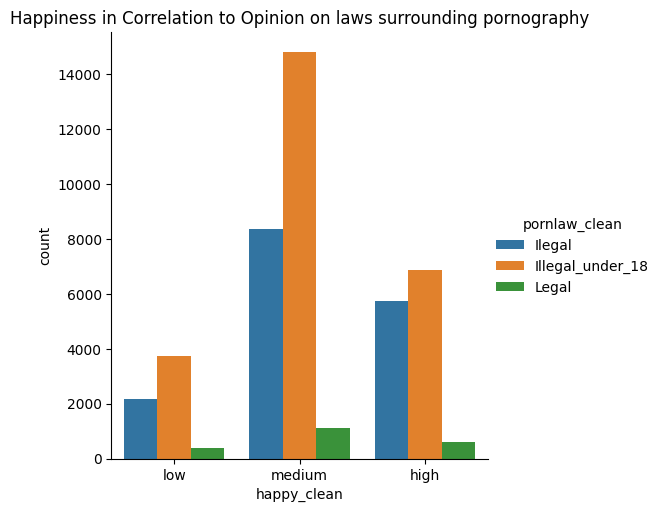

In [92]:
sns.catplot(x="happy_clean", hue="pornlaw_clean", kind="count", data=data)
plt.title("Happiness in Correlation to Opinion on laws surrounding pornography")
plt.show()

This graphic is showing the relationship between the happiness of an individual and their opinons on laws surrounding pornography. As discussed above, many people beleive pornography to be ill to society and may lead to temporary happiness, but not true happiness. This beleif is reflected in the data above. For any level of happiness, most people would like there to be laws surrounding pornography. This shows that a majority of happy people do not feel the need to have pornography available to be happy.

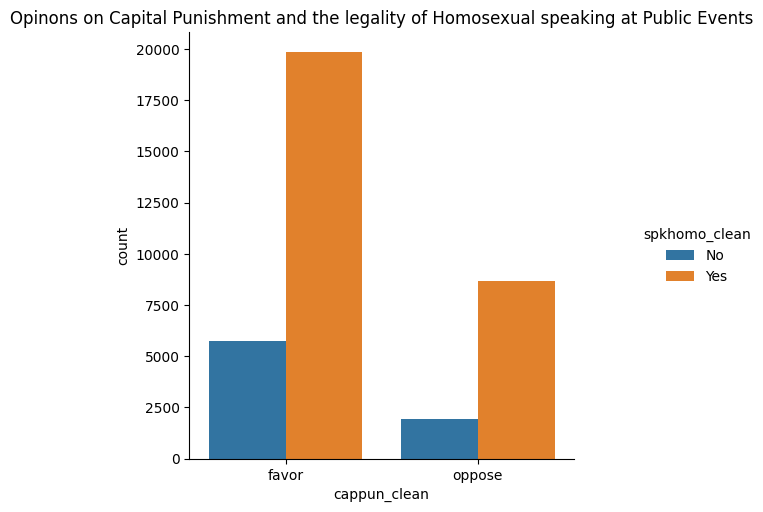

In [90]:
sns.catplot(x="cappun_clean", hue="spkhomo_clean", kind="count", data=data)
plt.title("Opinons on Capital Punishment and the legality of Homosexual speaking at Public Events")
plt.show()

This graphic shows the relationship between ones opinon on the legality of a homosexual being able to speak at a public event and ones opinon on capital punishment. While this may seem like an odd pairing at first, the purpose of this is to see if people with more liberal views (such as those who opppose capital punishment) also share a liberal view on other fields. This graph shows that the majority of both people who support and oppose the death penalty are ok with letting homosexuals speak at public events. While this does not carry the same logic as predicted, this shows that these two fields/beleifs are different enough not to be related.

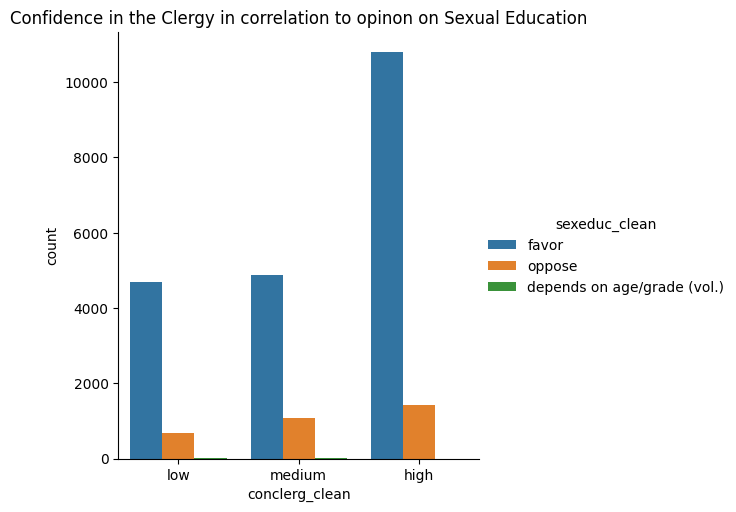

In [91]:
sns.catplot(x="conclerg_clean", hue="sexeduc_clean", kind="count", data=data)
plt.title("Confidence in the Clergy in correlation to opinon on Sexual Education")
plt.show()

The graphic above shows the correlation between confidence in the clergy and opinons on sexual education. For any level of confidence in the clergy there is a vast majority of survey participants that would rather their children have sexual education than not. This may be surprising to some who beleive that many religous people would rather not teach or talk about sexual education.

<Axes: xlabel='childs_clean', ylabel='Density'>

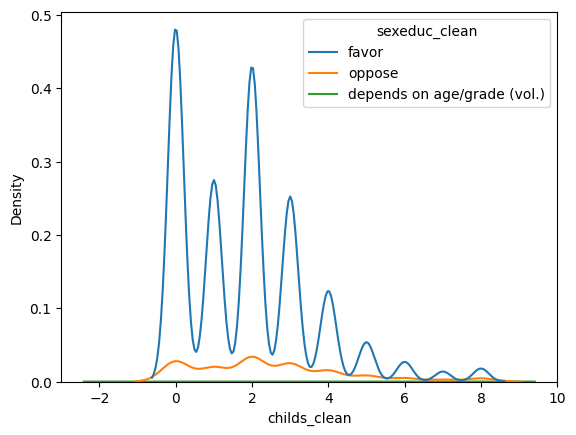

In [79]:
sns.kdeplot(data = data, x ="childs_clean", hue = 'sexeduc_clean')
plt.title("Number of children in relation to opions on Sexual Education")
plt.show()

This graphic shows a relationship between the amount of kids the participant has and the opinion of the participant on sexual eduction. Overwhemingly, the proportion of parents with any number of kids prefer for their child to receive sexual education rather than not. Surprisingly, the amount of parents who think that it should depend on the age/grade is extremely low, possibly suggesting that parents either want it or not (no inbetween).

In [86]:
print(data['age_clean'].describe())

count    71621.000000
mean        46.555982
std         17.600417
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         89.000000
Name: age_clean, dtype: float64


Provided above are statistics about the age of participants in this survey. The range of the 1st quartile is significantly lower than that of the 4th quartile. This means that more younger people were taking these surveys than older people. A statistic such as this might mean that the survey was more available to youger people, or that older people did not want to do it as much.